In [7]:
from agents import Agent, RandomAgent, HumanInput, EndAgent, RLAgent
from states import GameState, TOAD, FROG, BLANK
from game import run_game_loop, simulate_many_games, plot_losses

import random as rand
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch
import matplotlib.pyplot as plt
import time


In [8]:
initial_position = [TOAD] * 2 + [BLANK] * 10 + [FROG] * 2
G = GameState(initial_position, starting_player=TOAD)

In [9]:
rl_agent = RLAgent(G, TOAD, batch_size=100)
random_agent = RandomAgent(G, FROG)

Training 0.0% complete...
Training 0.8% complete...
Training 1.6% complete...
Training 2.4% complete...
Training 3.2% complete...
Training 4.0% complete...
Training 4.8% complete...
Training 5.6% complete...
Training 6.4% complete...
Training 7.2% complete...
Training 8.0% complete...
Training 8.8% complete...
Training 9.6% complete...
Training 10.4% complete...
Training 11.2% complete...
Training 12.0% complete...
Training 12.8% complete...
Training 13.6% complete...
Training 14.4% complete...
Training 15.2% complete...
Training 16.0% complete...
Training 16.8% complete...
Training 17.6% complete...
Training 18.4% complete...
Training 19.2% complete...
Training 20.0% complete...
Training 20.8% complete...
Training 21.6% complete...
Training 22.4% complete...
Training 23.2% complete...
Training 24.0% complete...
Training 24.8% complete...
Training 25.6% complete...
Training 26.4% complete...
Training 27.2% complete...
Training 28.0% complete...
Training 28.8% complete...
Training 29.6%

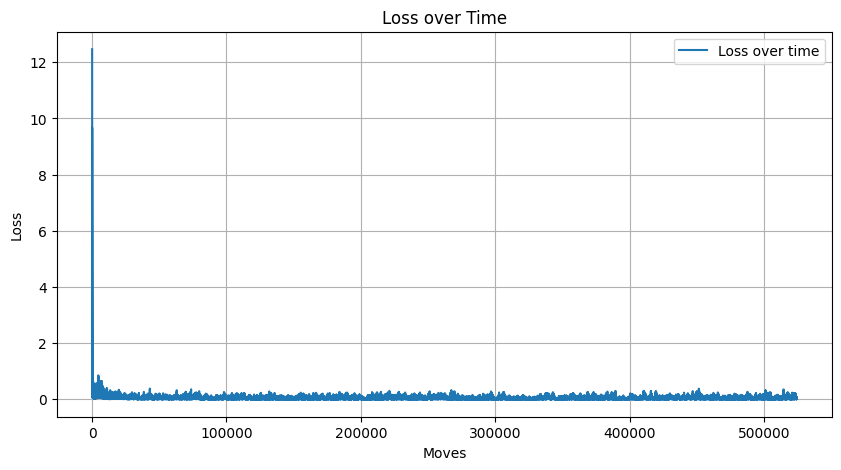

In [10]:
losses = rl_agent.train(opponent=random_agent, num_episodes=25000, start_epsilon=0.5, end_epsilon=0)
plot_losses(losses)

Simulation took 6.67386 seconds
Toads won 610 games (61.0%)
Frogs won 390 games (39.0%)


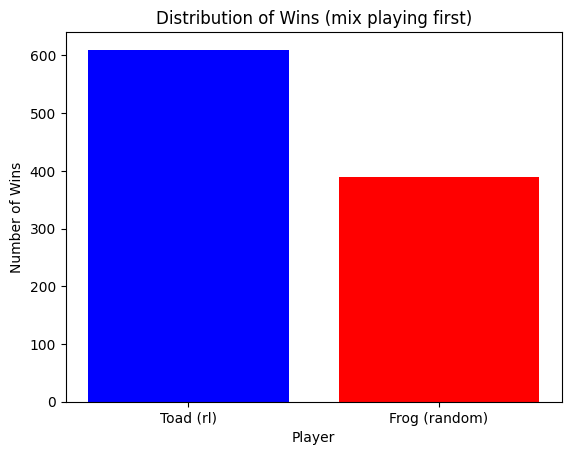

In [11]:
H = GameState(initial_position)
num_games = 1000
starting_player = 'mix'
tic = time.time()
results = simulate_many_games(num_games, H, rl_agent, random_agent,
                                starting_player=starting_player, verbose=False)
toc = time.time()
print(f'Simulation took {round(toc - tic, 5)} seconds')

# Count the number of wins for each player
t_wins = np.sum(results == TOAD)
f_wins = np.sum(results == FROG)
print(f"Toads won {t_wins} games ({round(t_wins / num_games * 100, 4)}%)")
print(f"Frogs won {f_wins} games ({round(f_wins / num_games * 100, 4)}%)")

# Plotting the results
plt.bar([f'Toad ({rl_agent.agent_name})', f'Frog ({random_agent.agent_name})'], [t_wins, f_wins], color=['blue', 'red'])
plt.xlabel('Player')
plt.ylabel('Number of Wins')
plt.title(f'Distribution of Wins ({starting_player} playing first)')
plt.show()

In [27]:
run_game_loop(G, rl_agent, random_agent, verbose=True)

Initializing game between rl as Toads and random as Frogs...
|T|T| | | | | | | | | | |F|F|
rl makes move 1
|T| |T| | | | | | | | | |F|F|
random makes move 1
|T| |T| | | | | | | | |F| |F|
rl makes move 1
|T| | |T| | | | | | | |F| |F|
random makes move 2
|T| | |T| | | | | | | |F|F| |
rl makes move 1
|T| | | |T| | | | | | |F|F| |
random makes move 1
|T| | | |T| | | | | |F| |F| |
rl makes move 1
|T| | | | |T| | | | |F| |F| |
random makes move 1
|T| | | | |T| | | |F| | |F| |
rl makes move 1
|T| | | | | |T| | |F| | |F| |
random makes move 1
|T| | | | | |T| |F| | | |F| |
rl makes move 1
|T| | | | | | |T|F| | | |F| |
random makes move 2
|T| | | | | | |T|F| | |F| | |
rl makes move 2
| |T| | | | | |T|F| | |F| | |
random makes move 1
| |T| | | | |F|T| | | |F| | |
rl makes move 2
| | |T| | | |F|T| | | |F| | |
random makes move 1
| | |T| | |F| |T| | | |F| | |
rl makes move 2
| | | |T| |F| |T| | | |F| | |
random makes move 2
| | | |T| |F| |T| | |F| | | |
rl makes move 2
| | | | |T|F| |T| | |F| | | |

True

# I play the trained agent

In [28]:
me = HumanInput(G, FROG, 'logan')
run_game_loop(G, rl_agent, me, verbose=True)

Initializing game between rl as Toads and logan as Frogs...
|T|T| | | | | | | | | | |F|F|
rl makes move 1
|T| |T| | | | | | | | | |F|F|
logan makes move 1
|T| |T| | | | | | | | |F| |F|
rl makes move 1
|T| | |T| | | | | | | |F| |F|
logan makes move 1
|T| | |T| | | | | | |F| | |F|
rl makes move 1
|T| | | |T| | | | | |F| | |F|
logan makes move 2
|T| | | |T| | | | | |F| |F| |
rl makes move 1
|T| | | | |T| | | | |F| |F| |
logan makes move 2
|T| | | | |T| | | | |F|F| | |
rl makes move 2
| |T| | | |T| | | | |F|F| | |
logan makes move 1
| |T| | | |T| | | |F| |F| | |
rl makes move 1
| |T| | | | |T| | |F| |F| | |
logan makes move 2
| |T| | | | |T| | |F|F| | | |
rl makes move 1
| |T| | | | | |T| |F|F| | | |
logan makes move 1
| |T| | | | | |T|F| |F| | | |
rl makes move 2
| | |T| | | | |T|F| |F| | | |
logan makes move 1
| | |T| | | |F|T| | |F| | | |
rl makes move 1
| | |T| | | |F| |T| |F| | | |
logan makes move 1
| | |T| | |F| | |T| |F| | | |
rl makes move 1
| | |T| | |F| | | |T|F| | | |
logan mak

True

It beat me...

# Train new models by playing the previously trained ones

Training 0.0% complete...
Training 2.0% complete...
Training 4.0% complete...
Training 6.0% complete...
Training 8.0% complete...
Training 10.0% complete...
Training 12.0% complete...
Training 14.0% complete...
Training 16.0% complete...
Training 18.0% complete...
Training 20.0% complete...
Training 22.0% complete...
Training 24.0% complete...
Training 26.0% complete...
Training 28.0% complete...
Training 30.0% complete...
Training 32.0% complete...
Training 34.0% complete...
Training 36.0% complete...
Training 38.0% complete...
Training 40.0% complete...
Training 42.0% complete...
Training 44.0% complete...
Training 46.0% complete...
Training 48.0% complete...
Training 50.0% complete...
Training 52.0% complete...
Training 54.0% complete...
Training 56.0% complete...
Training 58.0% complete...
Training 60.0% complete...
Training 62.0% complete...
Training 64.0% complete...
Training 66.0% complete...
Training 68.0% complete...
Training 70.0% complete...
Training 72.0% complete...
Traini

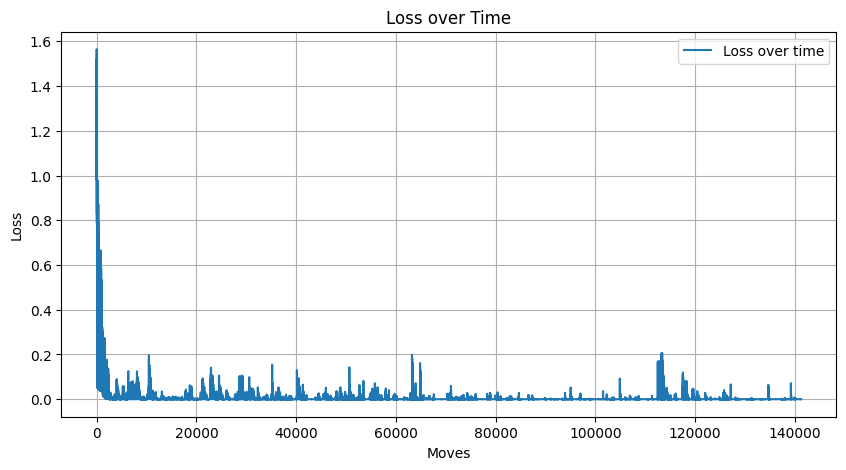

In [29]:
rl_agent2 = RLAgent(G, FROG, batch_size=100)
losses2 = rl_agent2.train(opponent=rl_agent, num_episodes=10000, start_epsilon=0.5, end_epsilon=0)
plot_losses(losses2)


Toads won 500 games (50.0%)
Frogs won 500 games (50.0%)


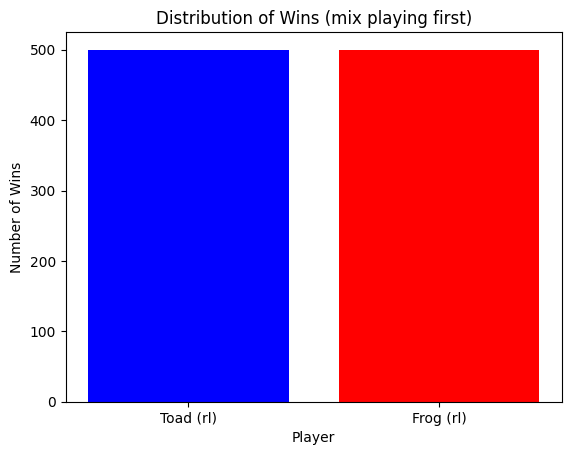

In [31]:
num_games = 1000
starting_player = 'mix'
results = simulate_many_games(num_games, H, rl_agent, rl_agent2,
                                starting_player=starting_player, verbose=False)

# Count the number of wins for each player
t_wins = np.sum(results == TOAD)
f_wins = np.sum(results == FROG)
print(f"Toads won {t_wins} games ({round(t_wins / num_games * 100, 4)}%)")
print(f"Frogs won {f_wins} games ({round(f_wins / num_games * 100, 4)}%)")

# Plotting the results
plt.bar([f'Toad ({rl_agent.agent_name})', f'Frog ({rl_agent2.agent_name})'], [t_wins, f_wins], color=['blue', 'red'])
plt.xlabel('Player')
plt.ylabel('Number of Wins')
plt.title(f'Distribution of Wins ({starting_player} playing first)')
plt.show()

In [54]:
G2 = G.copy()
G2.current_player = TOAD

G3 = G.copy()
G3.current_player = FROG

print(run_game_loop(G2, rl_agent, rl_agent2, verbose=False))
print(run_game_loop(G3, rl_agent, rl_agent2, verbose=False))

True
False


In [58]:
random_toad = RandomAgent(G, TOAD, 'random_toad')

num_games = 1000
starting_player = 'mix'
results = simulate_many_games(num_games, H, random_toad, rl_agent2,
                                starting_player=starting_player, verbose=False, plot=True)

# # Count the number of wins for each player
# t_wins = np.sum(results == TOAD)
# f_wins = np.sum(results == FROG)
# print(f"Toads won {t_wins} games ({round(t_wins / num_games * 100, 4)}%)")
# print(f"Frogs won {f_wins} games ({round(f_wins / num_games * 100, 4)}%)")

# # Plotting the results
# plt.bar([f'Toad ({random_toad.agent_name})', f'Frog ({rl_agent2.agent_name})'], [t_wins, f_wins], color=['blue', 'red'])
# plt.xlabel('Player')
# plt.ylabel('Number of Wins')
# plt.title(f'Distribution of Wins ({starting_player} playing first)')
# plt.show()

TypeError: simulate_many_games() got an unexpected keyword argument 'plot'